**Load data**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [134]:
df_hist = pd.read_csv('historical_data.csv')
df_fg   = pd.read_csv('fear_greed_index.csv')
df_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [135]:
print("Shape:", df_hist.shape)
print("\nColumns:", df_hist.columns.tolist())

print(df_hist.info())




Shape: (211224, 16)

Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          2

In [136]:

df_hist.isnull().sum().sort_values(ascending=False).head(15)


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [137]:
df_fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [138]:
print("Shape:", df_fg.shape)
print("\nInfo:")
print(df_fg.info())
print("\nMissing values (Top 15):")
print(df_fg.isnull().sum().sort_values(ascending=False).head(15))




Shape: (2644, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Missing values (Top 15):
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [139]:
# If sentiment column exists, show counts:
for col in ["Classification", "classification", "sentiment", "Sentiment"]:
    if col in df_fg.columns:
        print(f"\nSentiment value counts from column '{col}':")
        print(df_fg[col].value_counts(dropna=False))
        break


Sentiment value counts from column 'classification':
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


**Convert timestamp columns to datetime format**


In [140]:

df_fg['date'] = pd.to_datetime(df_fg['date'])

df_fg['timestamp_dt'] = pd.to_datetime(df_fg['timestamp'], unit='s')

# Convert historical_data timestamp
try:
    df_hist['Timestamp_dt'] = pd.to_datetime(df_hist['Timestamp'], unit='ms')
except:
    df_hist['Timestamp_dt'] = pd.to_datetime(df_hist['Timestamp'], unit='s')


df_hist['Timestamp IST_dt'] = pd.to_datetime(df_hist['Timestamp IST'], errors='coerce')

print("=== Converted timestamp samples ===")
print(df_hist[['Timestamp', 'Timestamp_dt']].head())
print("\n")
print(df_hist[['Timestamp IST', 'Timestamp IST_dt']].head())
print("\nFear-Greed date samples:")
print(df_fg[['timestamp', 'timestamp_dt', 'date']].head())

=== Converted timestamp samples ===
      Timestamp        Timestamp_dt
0  1.730000e+12 2024-10-27 03:33:20
1  1.730000e+12 2024-10-27 03:33:20
2  1.730000e+12 2024-10-27 03:33:20
3  1.730000e+12 2024-10-27 03:33:20
4  1.730000e+12 2024-10-27 03:33:20


      Timestamp IST    Timestamp IST_dt
0  02-12-2024 22:50 2024-02-12 22:50:00
1  02-12-2024 22:50 2024-02-12 22:50:00
2  02-12-2024 22:50 2024-02-12 22:50:00
3  02-12-2024 22:50 2024-02-12 22:50:00
4  02-12-2024 22:50 2024-02-12 22:50:00

Fear-Greed date samples:
    timestamp        timestamp_dt       date
0  1517463000 2018-02-01 05:30:00 2018-02-01
1  1517549400 2018-02-02 05:30:00 2018-02-02
2  1517635800 2018-02-03 05:30:00 2018-02-03
3  1517722200 2018-02-04 05:30:00 2018-02-04
4  1517808600 2018-02-05 05:30:00 2018-02-05


**Extract date from Timestamp_dt for daily analysis**

In [141]:
df_hist['date'] = df_hist['Timestamp_dt'].dt.date

print("Sample dates extracted:")
print(df_hist[['Timestamp_dt', 'date']].head())


print("\nDate range in trading data:")  #Check unique date range
print(df_hist['date'].min(), "→", df_hist['date'].max())




Sample dates extracted:
         Timestamp_dt        date
0 2024-10-27 03:33:20  2024-10-27
1 2024-10-27 03:33:20  2024-10-27
2 2024-10-27 03:33:20  2024-10-27
3 2024-10-27 03:33:20  2024-10-27
4 2024-10-27 03:33:20  2024-10-27

Date range in trading data:
2023-03-28 → 2025-06-15


In [142]:
# Count trades per day
daily_counts = df_hist['date'].value_counts().sort_index()
print("Trades per day (first 10 days):")
print(daily_counts.head(10))

Trades per day (first 10 days):
date
2023-03-28         3
2023-11-14      1045
2024-03-09      6962
2024-07-03      7141
2024-10-27     35241
2025-02-19    133871
2025-06-15     26961
Name: count, dtype: int64


Our trading data has a date column like:

2024-10-27


Fear–Greed dataset has:

date = 2018-02-01

In [143]:
df_fg['date_only'] = df_fg['date'].dt.date

df_fg_clean = df_fg[['date_only', 'value', 'classification']].copy() #keep useful columns only

print("Fear-Greed cleaned head:")
print(df_fg_clean.head())

# Check if fear-greed covers trade date range
trade_min = df_hist['date'].min()
trade_max = df_hist['date'].max()

print("\nTrade data range:", trade_min, "→", trade_max)

fg_range_min = df_fg_clean['date_only'].min()
fg_range_max = df_fg_clean['date_only'].max()

print("Fear-Greed range:", fg_range_min, "→", fg_range_max)



Fear-Greed cleaned head:
    date_only  value classification
0  2018-02-01     30           Fear
1  2018-02-02     15   Extreme Fear
2  2018-02-03     40           Fear
3  2018-02-04     24   Extreme Fear
4  2018-02-05     11   Extreme Fear

Trade data range: 2023-03-28 → 2025-06-15
Fear-Greed range: 2018-02-01 → 2025-05-02


In [144]:
# Show sentiment rows matching trade range
mask = (df_fg_clean['date_only'] >= trade_min) & (df_fg_clean['date_only'] <= trade_max)
print("\nFear–Greed rows that overlap with trading dates (first 10):")
print(df_fg_clean[mask].head(10))
print("\nTotal days overlapping:", mask.sum())


Fear–Greed rows that overlap with trading dates (first 10):
       date_only  value classification
1878  2023-03-28     59          Greed
1879  2023-03-29     57          Greed
1880  2023-03-30     60          Greed
1881  2023-03-31     63          Greed
1882  2023-04-01     61          Greed
1883  2023-04-02     63          Greed
1884  2023-04-03     63          Greed
1885  2023-04-04     62          Greed
1886  2023-04-05     62          Greed
1887  2023-04-06     63          Greed

Total days overlapping: 766


**Create daily trading metrics**

In [145]:
# Group by date
daily_stats = df_hist.groupby('date').agg({
    'Trade ID': 'count',             # total number of trades
    'Size USD': 'sum',               # total traded volume in USD
    'Execution Price': 'mean',       # avg execution price
    'Closed PnL': 'sum',             # total profit/loss
}).reset_index()


# Rename columns
daily_stats.rename(columns={
    'Trade ID': 'total_trades',
    'Size USD': 'total_volume_usd',
    'Execution Price': 'avg_execution_price',
    'Closed PnL': 'total_pnl'
}, inplace=True)





In [146]:
print("Daily stats sample (first 10 rows):")
print(daily_stats.head(10))



Daily stats sample (first 10 rows):
         date  total_trades  total_volume_usd  avg_execution_price  \
0  2023-03-28             3      4.770000e+02          1898.133333   
1  2023-11-14          1045      1.155543e+07         10454.871036   
2  2024-03-09          6962      3.940677e+07          9771.897315   
3  2024-07-03          7141      2.184323e+07          2663.132338   
4  2024-10-27         35241      1.039478e+08          5367.503277   
5  2025-02-19        133871      7.041585e+08         11102.057978   
6  2025-06-15         26961      3.102753e+08         23652.065078   

      total_pnl  
0  0.000000e+00  
1  1.555034e+02  
2  1.769655e+05  
3  1.587424e+05  
4  3.189461e+06  
5  6.699925e+06  
6  7.170935e+04  


In [147]:
print("\nSummary statistics:")
print(daily_stats.describe())


Summary statistics:
        total_trades  total_volume_usd  avg_execution_price     total_pnl
count       7.000000      7.000000e+00             7.000000  7.000000e+00
mean    30174.857143      1.701696e+08          9272.808622  1.470994e+06
std     47639.566148      2.589642e+08          7360.713241  2.581232e+06
min         3.000000      4.770000e+02          1898.133333  0.000000e+00
25%      4003.500000      1.669933e+07          4015.317807  3.593243e+04
50%      7141.000000      3.940677e+07          9771.897315  1.587424e+05
75%     31101.000000      2.071115e+08         10778.464507  1.683213e+06
max    133871.000000      7.041585e+08         23652.065078  6.699925e+06


**Merging Two Dataset**

In [148]:
merged = pd.merge(
    daily_stats,
    df_fg_clean,
    left_on='date',
    right_on='date_only',
    how='left'
)

In [149]:
merged = pd.merge(
    daily_stats,
    df_fg_clean,
    left_on='date',
    right_on='date_only',
    how='left'
)

# Drop redundant date column
merged.drop(columns=['date_only'], inplace=True)




In [150]:
merged.head(10)



,date,total_trades,total_volume_usd,avg_execution_price,total_pnl,value,classification
0,2023-03-28,3,4.770000e+02,1898.133333,0.000000e+00,59.0,Greed
1,2023-11-14,1045,1.155543e+07,10454.871036,1.555034e+02,69.0,Greed
2,2024-03-09,6962,3.940677e+07,9771.897315,1.769655e+05,84.0,Extreme Greed
3,2024-07-03,7141,2.184323e+07,2663.132338,1.587424e+05,50.0,Neutral
4,2024-10-27,35241,1.039478e+08,5367.503277,3.189461e+06,74.0,Greed
5,2025-02-19,133871,7.041585e+08,11102.057978,6.699925e+06,44.0,Fear
6,2025-06-15,26961,3.102753e+08,23652.065078,7.170935e+04,NaN,NaN


In [151]:
 merged.shape


(7, 7)

In [152]:
# STEP 7: Correlation between trading metrics and sentiment value

# Keep numeric columns only
numeric_cols = ['total_trades', 'total_volume_usd', 'avg_execution_price', 'total_pnl', 'value']
corr = merged[numeric_cols].corr()

print("Correlation matrix:")
print(corr)

Correlation matrix:
                     total_trades  total_volume_usd  avg_execution_price  \
total_trades             1.000000          0.956389             0.215034   
total_volume_usd         0.956389          1.000000             0.457517   
avg_execution_price      0.215034          0.457517             1.000000   
total_pnl                0.952702          0.830236            -0.001137   
value                   -0.547081         -0.572090             0.194022   

                     total_pnl     value  
total_trades          0.952702 -0.547081  
total_volume_usd      0.830236 -0.572090  
avg_execution_price  -0.001137  0.194022  
total_pnl             1.000000 -0.452662  
value                -0.452662  1.000000  


**Visualization**

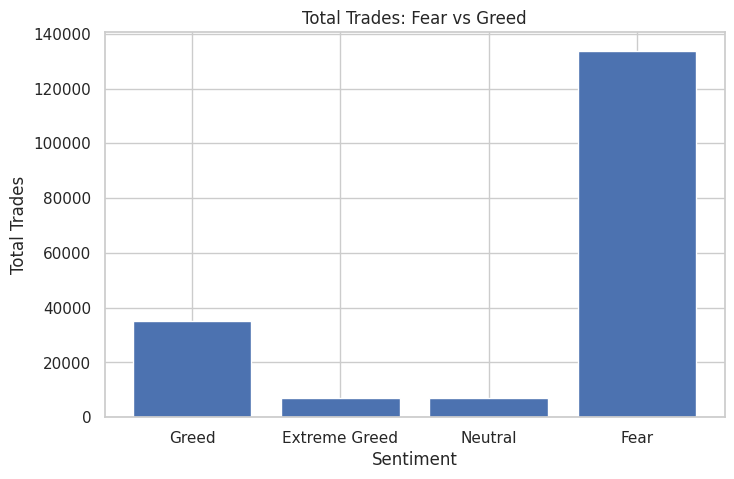

In [153]:
fear_greed = merged[merged['classification'].isin(['Fear','Extreme Greed','Neutral','Greed'])]

plt.figure(figsize=(8,5))
plt.bar(fear_greed['classification'], fear_greed['total_trades'])
plt.title("Total Trades: Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Total Trades")
plt.grid(True)
plt.show()


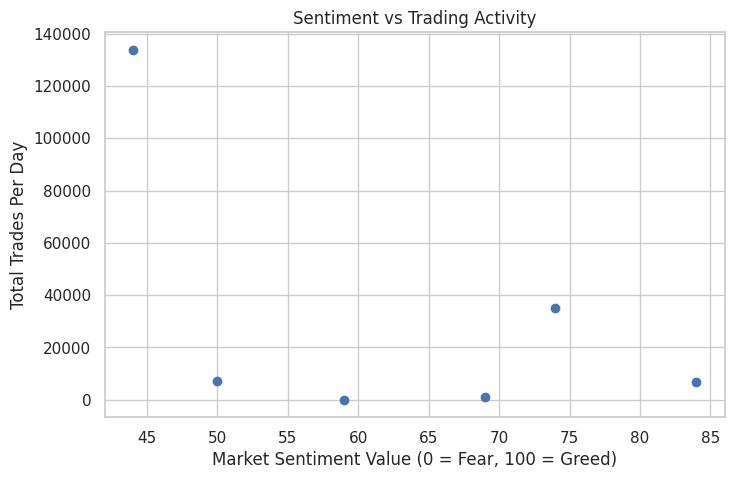

In [154]:
import matplotlib.pyplot as plt

# Sentiment vs Total Trades

plt.figure(figsize=(8,5))
plt.scatter(merged['value'], merged['total_trades'])
plt.xlabel("Market Sentiment Value (0 = Fear, 100 = Greed)")
plt.ylabel("Total Trades Per Day")
plt.title("Sentiment vs Trading Activity")
plt.grid(True)
plt.show()


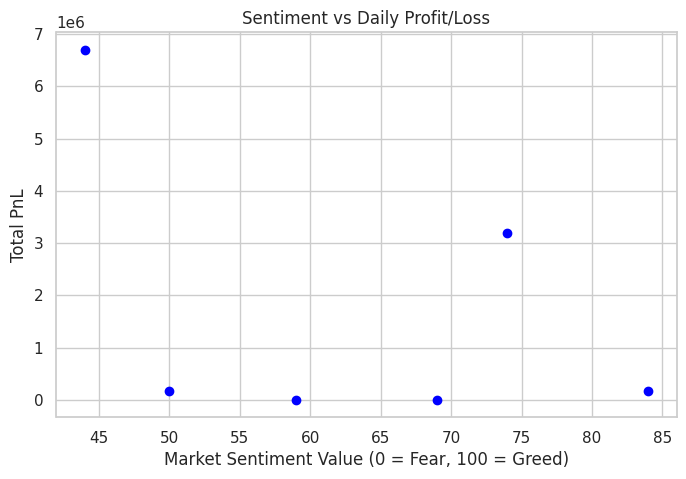

In [155]:
#Sentiment vs PnL

plt.figure(figsize=(8,5))
plt.scatter(merged['value'], merged['total_pnl'], c='blue')
plt.xlabel("Market Sentiment Value (0 = Fear, 100 = Greed)")
plt.ylabel("Total PnL")
plt.title("Sentiment vs Daily Profit/Loss")
plt.grid(True)
plt.show()


In [156]:
#  Group by sentiment classification

sentiment_group = merged.groupby('classification').agg({
    'total_trades': 'mean',
    'total_volume_usd': 'mean',
    'avg_execution_price': 'mean',
    'total_pnl': 'mean'
}).reset_index()

print("Trading behavior by sentiment category:")
print(sentiment_group)


Trading behavior by sentiment category:
  classification   total_trades  total_volume_usd  avg_execution_price  \
0  Extreme Greed    6962.000000      3.940677e+07          9771.897315   
1           Fear  133871.000000      7.041585e+08         11102.057978   
2          Greed   12096.333333      3.850122e+07          5906.835882   
3        Neutral    7141.000000      2.184323e+07          2663.132338   

      total_pnl  
0  1.769655e+05  
1  6.699925e+06  
2  1.063206e+06  
3  1.587424e+05  


/tmp/ipython-input-2203785870.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_group, x='classification', y='total_trades', palette='viridis')


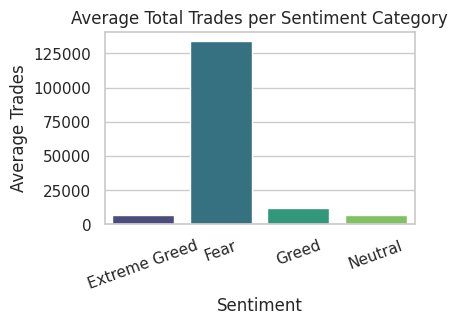

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns


sentiment_group = merged.groupby('classification').agg({
    'total_trades': 'mean',
    'total_volume_usd': 'mean',
    'total_pnl': 'mean'
}).reset_index()

sns.set(style="whitegrid")

# Total Trades by Sentiment
plt.figure(figsize=(4,2.5))
sns.barplot(data=sentiment_group, x='classification', y='total_trades', palette='viridis')
plt.title("Average Total Trades per Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average Trades")
plt.xticks(rotation=20)
plt.show()


/tmp/ipython-input-643142597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_group, x='classification', y='total_volume_usd', palette='magma')


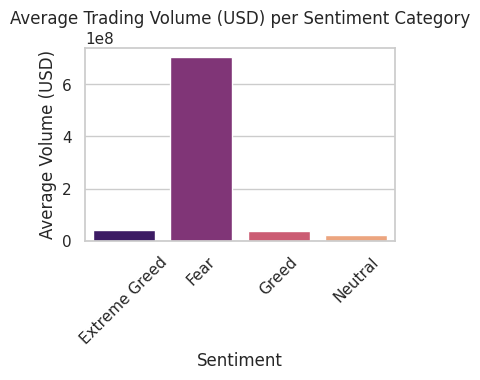

In [158]:
#Total Volume by Sentiment
plt.figure(figsize=(4,2.5))
sns.barplot(data=sentiment_group, x='classification', y='total_volume_usd', palette='magma')
plt.title("Average Trading Volume (USD) per Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average Volume (USD)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-4222940727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_group, x='classification', y='total_pnl', palette='coolwarm')


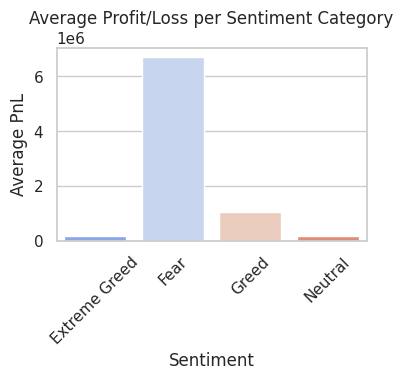

In [159]:

# Total PnL by Sentiment
plt.figure(figsize=(4,2.5))
sns.barplot(data=sentiment_group, x='classification', y='total_pnl', palette='coolwarm')
plt.title("Average Profit/Loss per Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.show()

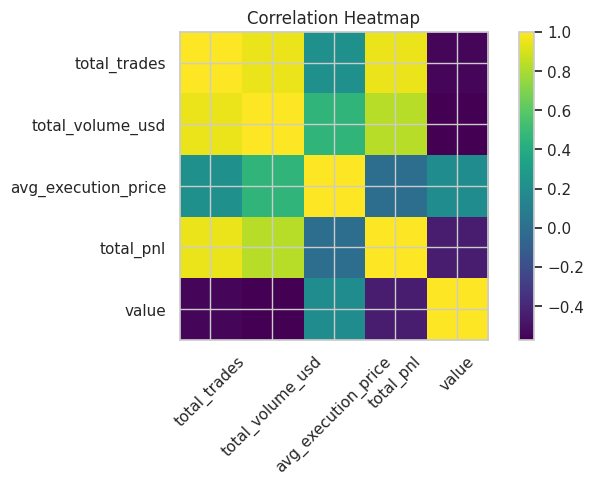

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# correlation matrix
corr = merged[['total_trades','total_volume_usd','avg_execution_price','total_pnl','value']].corr()

plt.figure(figsize=(8,4))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.show()


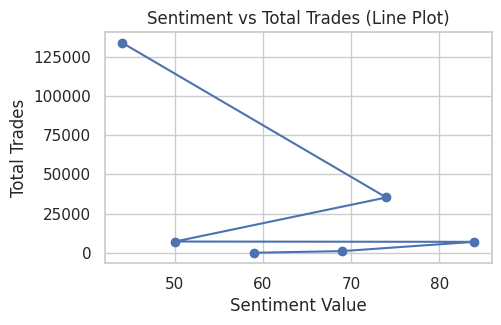

In [161]:
plt.figure(figsize=(5,3))
plt.plot(merged['value'], merged['total_trades'], 'o-')
plt.xlabel("Sentiment Value")
plt.ylabel("Total Trades")
plt.title("Sentiment vs Total Trades (Line Plot)")
plt.grid(True)
plt.show()


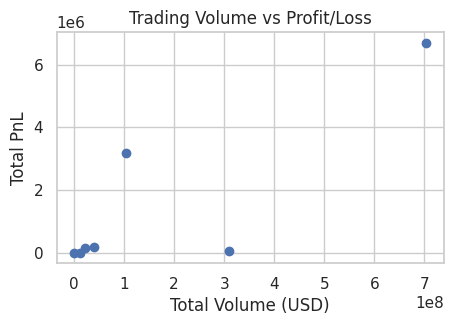

In [162]:
plt.figure(figsize=(5,3))
plt.scatter(merged['total_volume_usd'], merged['total_pnl'])
plt.xlabel("Total Volume (USD)")
plt.ylabel("Total PnL")
plt.title("Trading Volume vs Profit/Loss")
plt.grid(True)
plt.show()
